In [127]:
%matplotlib inline

from __future__ import division

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

import matplotlib.colors as colors
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec

import pymc as mc

In [245]:
log_path = "logs_635764698519574970"
df = pd.read_csv("%s/weights.csv" % log_path, header=None)

In [246]:
df

,0,1,2,3,4,5,6,7,8,9,...,59990,59991,59992,59993,59994,59995,59996,59997,59998,59999
0,2.857832,0.551655,-2.492262,-2.585512,-2.590042,0.744767,-1.980777,-2.146101,-0.749704,-0.815982,...,-0.287248,-0.992082,-0.835873,-1.396783,-0.581777,-0.243738,0.472097,-0.659781,-1.282927,1.110589
1,4.021925,1.620865,-1.884395,-1.801961,-1.902793,1.250875,-1.412325,-1.609057,0.447534,-0.243608,...,-0.287248,-0.992082,-0.835873,-1.396783,-0.581777,-0.243738,0.472097,-0.659781,-1.282927,1.110589
2,5.061457,2.691573,-2.402598,-0.976282,-2.419797,2.064967,-1.891151,-2.128523,1.134423,0.573972,...,-0.287248,-0.992082,-0.835873,-1.396783,-0.581777,-0.243738,0.472097,-0.659781,-1.282927,1.110589
3,5.061457,2.691573,-2.402598,-0.976282,-2.419797,2.064967,-1.891151,-2.128523,1.134423,0.573972,...,-0.287248,-0.992082,-0.835873,-1.396783,-0.581777,-0.243738,0.472097,-0.659781,-1.282927,1.110589
4,11.703647,9.517294,-0.740075,5.335950,-0.249576,8.700708,0.008181,-0.203588,8.013698,7.015340,...,-0.287248,-0.992082,-0.835873,-1.396783,-0.581777,-0.243738,0.472097,-0.659781,-1.282927,1.110589


In [247]:
w = df.values[4]

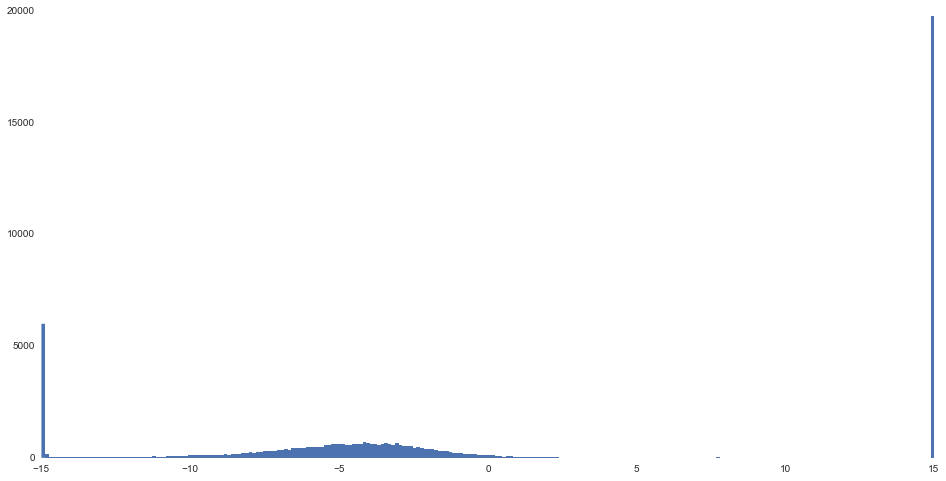

In [248]:
plt.figure(figsize=(16, 8))
_ = plt.hist(w, 250, lw=0)

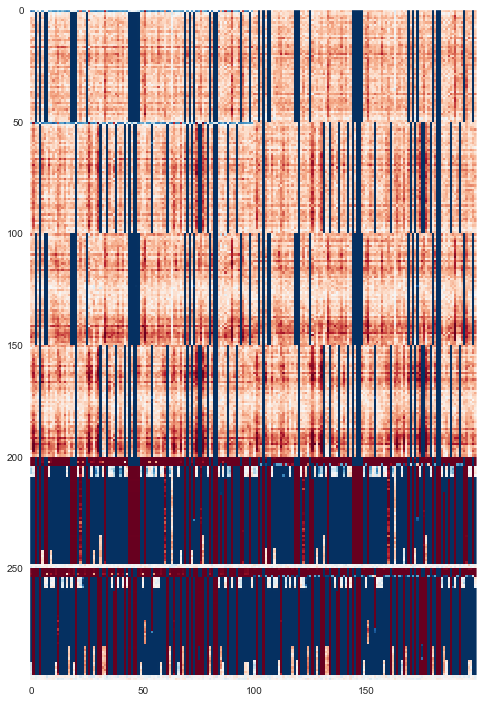

In [265]:
plt.figure(figsize=(16, 12))
plt.imshow(np.reshape(w, (300, 200)), interpolation='none', cmap='RdBu', aspect=1, norm=colors.Normalize())
plt.grid(False)

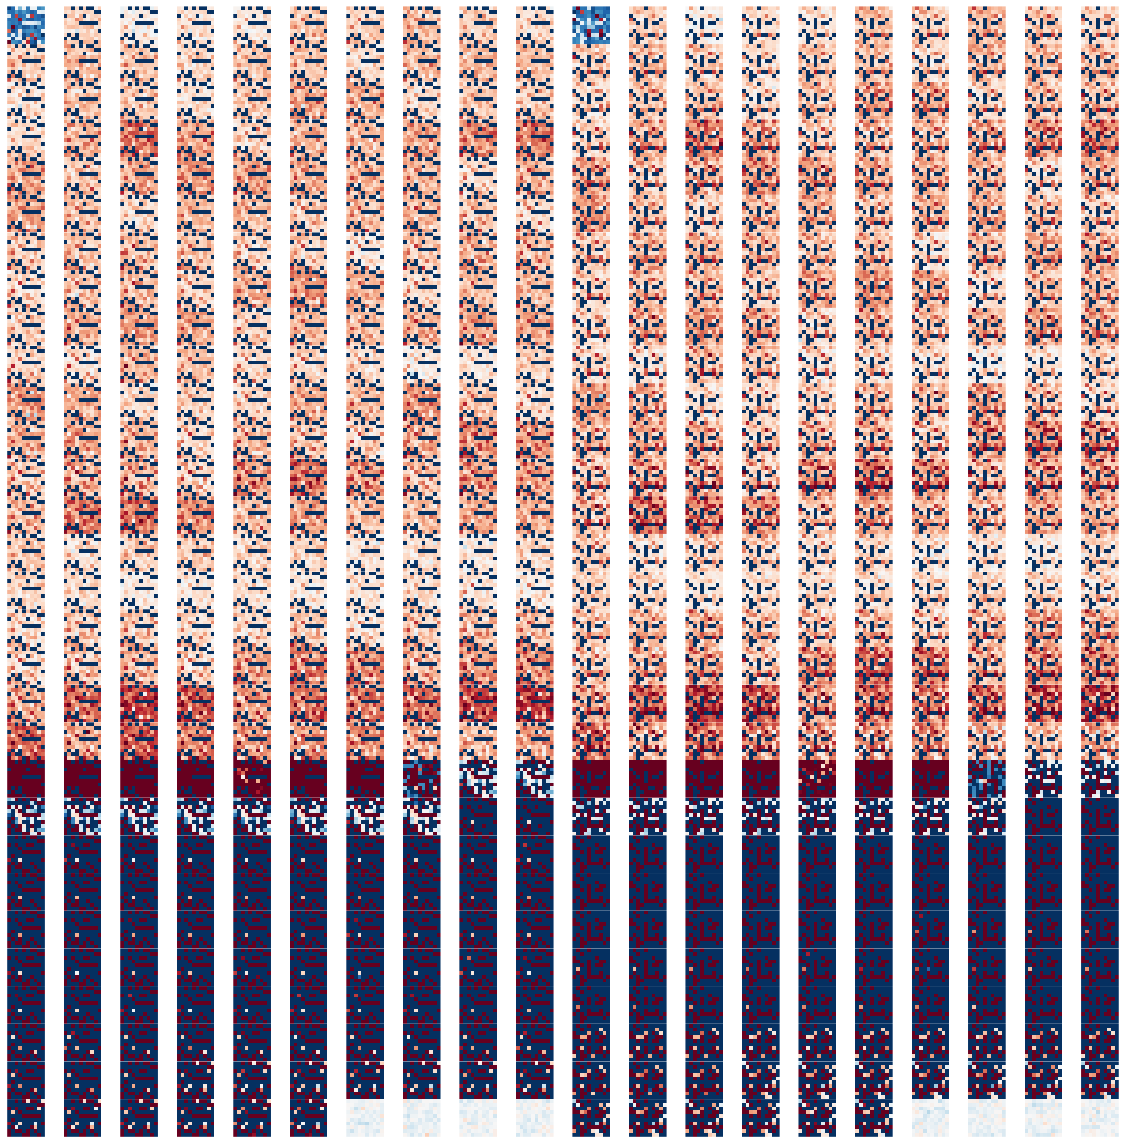

In [264]:
# there are 60,000 synapses
# 10,000 for each input layer, going to each output layer (x2)
# of those 10,000 are 100 outgoing from each input neuron

group_size = 10000
layer_size = 100

fig = plt.figure(figsize=(16, 16))
norm = colors.Normalize()

outer_gs = gridspec.GridSpec(3, 2, wspace=0.0, hspace=0.0)

for i in xrange(6):
    inner_gs = gridspec.GridSpecFromSubplotSpec(10, 10,
        subplot_spec=outer_gs[i], wspace=0.0, hspace=0.0)

    group_start = i * group_size
    group_end = group_start + group_size
    group_w = w[group_start:group_end]

    for j in range(0, layer_size):
        input_start = j * layer_size
        input_end = input_start + layer_size
        input_w = np.reshape(group_w[input_start:input_end], (10, 10))
        
        ax = plt.Subplot(fig, inner_gs[j])

        ax.imshow(input_w, interpolation='none', cmap='RdBu', aspect='equal', norm=norm)

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(False)
        fig.add_subplot(ax)

plt.tight_layout()
plt.show()

# Animation

In [266]:
dfI = pd.read_csv("%s/input.csv" % log_path, header=None)
dfO = pd.read_csv("%s/output.csv" % log_path, header=None)

In [267]:
def animate(data):
  def inner(nframe):
    plt.cla()
    plt.plot(data.columns.values, data.ix[nframe])
  return inner

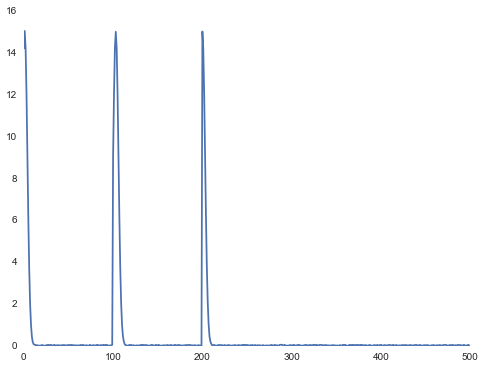

In [268]:
fig = plt.figure(figsize=(8, 6))  
anim = animation.FuncAnimation(fig, animate(dfI), frames=100)
anim.save('input.gif', writer='imagemagick', fps=10);

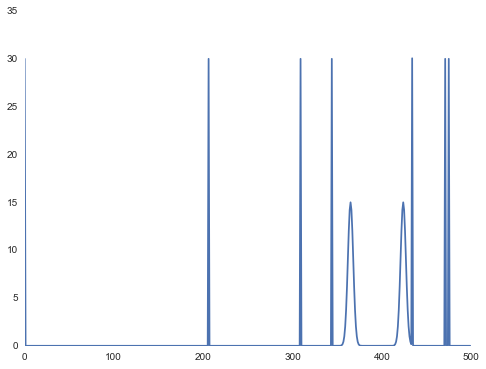

In [269]:
fig = plt.figure(figsize=(8, 6))
anim = animation.FuncAnimation(fig, animate(dfO), frames=1000)
anim.save('output.gif', writer='imagemagick', fps=1);